In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
from zipfile import ZipFile
file_name = "project_deep_learning.zip"


with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Done")

Done


In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
%matplotlib inline

In [0]:
base_dir = 'data/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)


In [16]:
classes = ["cats","dogs"]
len(classes)

2

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 32 filters that are 5x5
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 5, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 64 filters that are 5x5
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 5, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

#flatten
x = layers.Flatten()(x)
x = layers.Dense(32,activation='relu')(x)
#x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim 
#x = layers.Flatten()(x)

# Add a dropout rate of 0.4
x = layers.Dropout(0.4)(x)

# Create output layer with  softmax activation
output = layers.Dense(len(classes), activation='softmax')(x)

# Configure and compile the model
model = Model(img_input, output)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [37]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 69, 69, 64)        51264     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 34, 34, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 73984)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2367

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size= 10,
        class_mode='binary')

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [39]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch= 4,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=2,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
4/4 - 4s - loss: 5.9313 - acc: 0.4875 - val_loss: 7.6685 - val_acc: 0.5000
Epoch 2/100
4/4 - 4s - loss: 7.6685 - acc: 0.5000 - val_loss: 7.6729 - val_acc: 0.4500
Epoch 3/100
4/4 - 4s - loss: 7.6685 - acc: 0.5000 - val_loss: 7.6685 - val_acc: 0.5000
Epoch 4/100
4/4 - 4s - loss: 5.0790 - acc: 0.4625 - val_loss: 0.6937 - val_acc: 0.4500
Epoch 5/100
4/4 - 4s - loss: 0.6935 - acc: 0.4625 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 6/100
4/4 - 4s - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5500
Epoch 7/100
4/4 - 4s - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 8/100
4/4 - 4s - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5500
Epoch 9/100
4/4 - 4s - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 10/100
4/4 - 4s - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 11/100
4/4 - 4s - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 12/100
4/4 - 4s - loss: 0.6931 - ac

Text(0.5, 1.0, 'Training and validation loss')

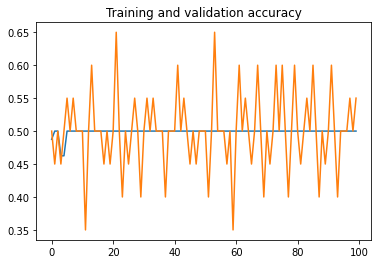

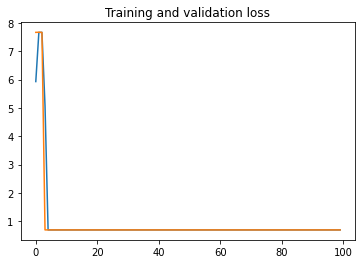

In [40]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')